## any pandas stuff i didnt know

In [45]:
import pandas as pd

## Exploring & Understanding DataFrame Data

In [46]:
data_path = "C:/Users/eacalder/Documents/Education/DataScienceInfinity/Leasson_Downloads/E_PythonDS03grocery_database.xlsx"

data = pd.read_excel(data_path, sheet_name="transactions")

In [53]:
data.shape
data.head()
data.tail()
# rows at randmom
data.sample(10)

sample = data.sample(frac = .1)
print(sample)

data.describe()



       customer_id transaction_date  transaction_id  product_area_id  \
13077          286       2020-04-20    435751030577                1   
32025          727       2020-04-03    435586786766                1   
7450           157       2020-08-28    437054590241                2   
37090          841       2020-05-29    436149099095                2   
32247          731       2020-05-25    436109291592                1   
...            ...              ...             ...              ...   
37176          842       2020-09-27    437356726268                3   
32774          744       2020-07-30    436766351117                1   
25543          576       2020-07-06    436522718074                3   
33840          768       2020-08-30    437074990810                4   
9142           199       2020-06-11    436279880062                5   

       num_items  sales_cost  
13077          6      125.43  
32025          5       93.61  
7450           7       21.83  
37090      

,customer_id,transaction_id,product_area_id,num_items,sales_cost
count,38506.000000,3.850600e+04,38506.000000,38506.000000,38506.000000
mean,429.884252,4.364726e+11,2.888303,6.190672,40.246398
std,255.218578,5.289576e+08,1.360284,5.961531,54.597118
min,1.000000,4.355612e+11,1.000000,1.000000,0.000000
25%,209.000000,4.360164e+11,2.000000,2.000000,11.420000
50%,422.000000,4.364727e+11,3.000000,4.000000,23.180000
75%,656.000000,4.369285e+11,4.000000,8.000000,45.980000
max,870.000000,4.373898e+11,5.000000,310.000000,669.340000


In [55]:
data.nlargest(5,"sales_cost")

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost
10443,224,2020-07-22,436683121376,1,27,669.34
1367,27,2020-08-31,437085904531,1,27,639.22
491,10,2020-09-29,437372244148,1,26,630.88
26319,593,2020-09-04,437126622541,1,24,611.83
32232,731,2020-04-29,435847289476,1,27,600.48


In [56]:
data.nsmallest(5,"sales_cost")

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost
14935,326,2020-09-07,437152966988,2,3,0.00
17926,392,2020-08-01,436789522435,2,6,0.00
19864,435,2020-04-26,435811839549,2,1,0.00
35057,796,2020-06-18,436342092911,2,7,0.00
10933,236,2020-05-06,435916318917,2,2,0.01


In [58]:
data.nunique()

customer_id           870
transaction_date      183
transaction_id      18160
product_area_id         5
num_items              59
sales_cost          10986
dtype: int64

In [61]:
customer_details = pd.read_excel(data_path, sheet_name="customer_details")

customer_details.isna().sum()

customer_id            0
distance_from_store    5
gender                 5
credit_score           8
dtype: int64

## Accessing Specific Columns In Our DataFrame

In [62]:
transactions = pd.read_excel(data_path, sheet_name="transactions")

In [70]:
transactions.head()

# not the best approach
newdf = transactions.customer_id
print(newdf)

myvar = "customer_id"

newdf = transactions["customer_id"]
print(transactions[myvar])

# Better
new_df = transactions[["customer_id"]]
print(new_df)

new_df = transactions[["customer_id","sales_cost"]]
print(new_df)


0          1
1          1
2          1
3          1
4          1
        ... 
38501    870
38502    870
38503    870
38504    870
38505    870
Name: customer_id, Length: 38506, dtype: int64
0          1
1          1
2          1
3          1
4          1
        ... 
38501    870
38502    870
38503    870
38504    870
38505    870
Name: customer_id, Length: 38506, dtype: int64
       customer_id
0                1
1                1
2                1
3                1
4                1
...            ...
38501          870
38502          870
38503          870
38504          870
38505          870

[38506 rows x 1 columns]
       customer_id  sales_cost
0                1       19.16
1                1        7.71
2                1       26.97
3                1       38.52
4                1       22.13
...            ...         ...
38501          870       51.61
38502          870       33.77
38503          870       23.46
38504          870       18.52
38505          870       

## Adding & Dropping Columns In Our DataFrame

In [78]:
import numpy as np
transactions.head()

transactions["store_is"] = 1
transactions.head()
transactions["profit"] = transactions["sales_cost"] * .2
print(transactions.head())

transactions["sales_type"] = np.where(transactions["sales_cost"] > 20, "Large", "Small")

print(transactions.head())

condition_rules = [transactions["sales_cost"] > 50,transactions["sales_cost"] > 20,transactions["sales_cost"] > 10]
outcomes = ["X-Large", "Large", "Medium"]

transactions["sales_type"] = np.select(condition_rules, outcomes, default = "Small")

print(transactions.head())


new_df = transactions.drop(["sales_cost"], axis = 1)
print(new_df.head())

   customer_id transaction_date  transaction_id  product_area_id  num_items  \
0            1       2020-04-10    435657533999                3          7   
1            1       2020-04-10    435657533999                2          5   
2            1       2020-06-02    436189770685                4          4   
3            1       2020-06-02    436189770685                1          2   
4            1       2020-06-10    436265380298                4          4   

   sales_cost  store_is  profit sales_type  
0       19.16         1   3.832     Medium  
1        7.71         1   1.542      Small  
2       26.97         1   5.394      Large  
3       38.52         1   7.704      Large  
4       22.13         1   4.426      Large  
   customer_id transaction_date  transaction_id  product_area_id  num_items  \
0            1       2020-04-10    435657533999                3          7   
1            1       2020-04-10    435657533999                2          5   
2            1    

##  Adding Columns Using Map, Replace, And Apply

In [80]:
customer_details.head()
product_areas = pd.read_excel(data_path, sheet_name="product_areas")

In [82]:
# map
customer_details["gender_numeric"] = customer_details["gender"].map({"M":0,"F":1})
customer_details.head()
customer_details["gender_numeric"] = customer_details["gender"].map({"F":1})
customer_details.head()# see if you dont specify how it errors

,customer_id,distance_from_store,gender,credit_score,gender_numeric
0,74,3.38,F,0.59,1.0
1,524,4.76,F,0.52,1.0
2,607,4.45,F,0.49,1.0
3,343,0.91,M,0.54,NaN
4,322,3.02,F,0.63,1.0


In [84]:
# replace
customer_details["gender_numeric"] = customer_details["gender"].replace({"M":0,"F":1})
customer_details.head()
customer_details["gender_numeric"] = customer_details["gender"].replace({"F":1})
customer_details.head()# keeps M instead of null

,customer_id,distance_from_store,gender,credit_score,gender_numeric
0,74,3.38,F,0.59,1
1,524,4.76,F,0.52,1
2,607,4.45,F,0.49,1
3,343,0.91,M,0.54,M
4,322,3.02,F,0.63,1


In [87]:
# apply

product_areas["product_area_name"].apply(len)

def update_profit_margin(profit_margin):
    if profit_margin > .2:
        return profit_margin * 1.2
    else:
        return profit_margin * .8

product_areas["profit_margin_updated"] = product_areas["profit_margin"].apply(update_profit_margin)


In [89]:
x = pd.DataFrame({"A" : [1,2], "B" : [3,4], "C" : [5,6]})

print(x.apply(max))
print(x.apply(max, axis = 1))

A    2
B    4
C    6
dtype: int64
0    5
1    6
dtype: int64


In [90]:
def square(n):
    return n ** 2

x.applymap(square)

,A,B,C
0,1,9,25
1,4,16,36


## Sorting

In [92]:
customer_details.head()
customer_details.sort_values(by="distance_from_store", inplace=True)
customer_details.head()


,customer_id,distance_from_store,gender,credit_score,gender_numeric
458,22,0.00,M,0.68,M
131,260,0.00,M,0.71,M
92,640,0.00,M,0.52,M
683,804,0.01,M,0.53,M
227,2,0.01,M,0.54,M


In [93]:
customer_details.sort_values(by="distance_from_store", inplace=True, ascending=False)
customer_details.head()

,customer_id,distance_from_store,gender,credit_score,gender_numeric
860,711,400.97,F,0.54,1
197,415,113.89,F,0.57,1
35,762,44.37,F,0.55,1
613,229,18.09,F,0.67,1
8,52,14.91,F,0.68,1


In [94]:
customer_details.sort_values(by=["distance_from_store","credit_score"], inplace=True, ascending=False)
customer_details.head()

,customer_id,distance_from_store,gender,credit_score,gender_numeric
860,711,400.97,F,0.54,1
197,415,113.89,F,0.57,1
35,762,44.37,F,0.55,1
613,229,18.09,F,0.67,1
8,52,14.91,F,0.68,1


In [95]:
customer_details.sort_values(by="distance_from_store", inplace=True, na_position="first")
customer_details.head()

,customer_id,distance_from_store,gender,credit_score,gender_numeric
314,105,NaN,F,0.71,1
576,362,NaN,NaN,0.56,NaN
466,218,NaN,M,0.37,M
169,517,NaN,NaN,NaN,NaN
845,292,NaN,NaN,NaN,NaN


## ranking

In [98]:
x=pd.DataFrame({"column1" : [1,1,1,2,3,4,5,np.nan,6,8]})
x.head(10)

,column1
0,1.0
1,1.0
2,1.0
3,2.0
4,3.0
5,4.0
6,5.0
7,NaN
8,6.0
9,8.0


In [101]:
x["columnrank"] = x["column1"].rank()
x.head(10)

,column1,solumnrank,columnrank
0,1.0,2.0,2.0
1,1.0,2.0,2.0
2,1.0,2.0,2.0
3,2.0,4.0,4.0
4,3.0,5.0,5.0
5,4.0,6.0,6.0
6,5.0,7.0,7.0
7,NaN,NaN,NaN
8,6.0,8.0,8.0
9,8.0,9.0,9.0


In [102]:
x["averagerank"] = x["column1"].rank(method="average")
x["minrank"] = x["column1"].rank(method="min")
x["maxrank"] = x["column1"].rank(method="max")
x["firstrank"] = x["column1"].rank(method="first")
x["denserank"] = x["column1"].rank(method="dense")

x.head(10)

,column1,solumnrank,columnrank,averagerank,minrank,maxrank,firstrank,denserank
0,1.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0
1,1.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0
2,1.0,2.0,2.0,2.0,1.0,3.0,3.0,1.0
3,2.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0
4,3.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0
5,4.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0
6,5.0,7.0,7.0,7.0,7.0,7.0,7.0,5.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6.0,8.0,8.0,8.0,8.0,8.0,8.0,6.0
9,8.0,9.0,9.0,9.0,9.0,9.0,9.0,7.0


In [103]:
x["denserank_top"] = x["column1"].rank(method="dense", na_option="top")
x["denserank_bottom"] = x["column1"].rank(method="dense", na_option="bottom")

x.head(10)

,column1,solumnrank,columnrank,averagerank,minrank,maxrank,firstrank,denserank,denserank_top,denserank_bottom
0,1.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0
1,1.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,2.0,1.0
2,1.0,2.0,2.0,2.0,1.0,3.0,3.0,1.0,2.0,1.0
3,2.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0
4,3.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,3.0
5,4.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,5.0,4.0
6,5.0,7.0,7.0,7.0,7.0,7.0,7.0,5.0,6.0,5.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.0
8,6.0,8.0,8.0,8.0,8.0,8.0,8.0,6.0,7.0,6.0
9,8.0,9.0,9.0,9.0,9.0,9.0,9.0,7.0,8.0,7.0


## Selecting Rows & Columns using LOC & ILOC

In [115]:
transactions = pd.read_excel(data_path, sheet_name="transactions")
transactions.head()
#LOC
transactions.loc["row_labels","column_labels"]
# ILOC
transactions.iloc["row_index","column_index"]

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost
0,1,2020-04-10,435657533999,3,7,19.16
1,1,2020-04-10,435657533999,2,5,7.71
2,1,2020-06-02,436189770685,4,4,26.97
3,1,2020-06-02,436189770685,1,2,38.52
4,1,2020-06-10,436265380298,4,4,22.13


In [117]:
transactions.iloc[0] # one row to be returned
transactions.iloc[0:4]
transactions.iloc[[0,30,51]]
transactions.iloc[0:4,[0,3,-1]]


transactions.iloc[:,[0,3,-1]]

,customer_id,product_area_id,sales_cost
0,1,3,19.16
1,1,2,7.71
2,1,4,26.97
3,1,1,38.52
4,1,4,22.13
...,...,...,...
38501,870,5,51.61
38502,870,2,33.77
38503,870,5,23.46
38504,870,1,18.52


In [118]:
transactions.loc[0] 

customer_id                           1
transaction_date    2020-04-10 00:00:00
transaction_id             435657533999
product_area_id                       3
num_items                             7
sales_cost                        19.16
Name: 0, dtype: object

In [123]:
# transactions.set_index("customer_id", inplace=True) 
transactions.reset_index(inplace=True)
transactions.head() 

,index,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost
0,0,1,2020-04-10,435657533999,3,7,19.16
1,1,1,2020-04-10,435657533999,2,5,7.71
2,2,1,2020-06-02,436189770685,4,4,26.97
3,3,1,2020-06-02,436189770685,1,2,38.52
4,4,1,2020-06-10,436265380298,4,4,22.13


In [125]:
transactions.loc[0:10,"customer_id"]
transactions.loc[0:10,["customer_id","product_area_id","sales_cost"]]

,customer_id,product_area_id,sales_cost
0,1,3,19.16
1,1,2,7.71
2,1,4,26.97
3,1,1,38.52
4,1,4,22.13
5,1,1,34.23
6,1,2,15.35
7,1,4,14.86
8,1,5,44.97
9,1,2,2.08


In [126]:
# conditional logic
transactions["customer_id"] == 642

0        False
1        False
2        False
3        False
4        False
         ...  
38501    False
38502    False
38503    False
38504    False
38505    False
Name: customer_id, Length: 38506, dtype: bool

In [133]:
transactions.loc[transactions["customer_id"] == 642]
transactions.loc[transactions["customer_id"] == 642, ["customer_id", "sales_cost"]]
transactions.loc[(transactions["customer_id"] == 642) & (transactions["num_items"] > 5)]
transactions.loc[(transactions["customer_id"] == 642) | (transactions["num_items"] > 5)]

,index,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost
0,0,1,2020-04-10,435657533999,3,7,19.16
6,6,1,2020-06-10,436265380298,2,7,15.35
8,8,1,2020-06-19,436352035866,5,6,44.97
9,9,1,2020-06-19,436352035866,2,6,2.08
12,12,1,2020-07-02,436488780919,1,18,385.68
...,...,...,...,...,...,...,...
38496,38496,870,2020-09-21,437291420399,3,18,66.67
38499,38499,870,2020-09-23,437316479610,4,6,17.73
38500,38500,870,2020-09-23,437316479610,3,14,42.38
38502,38502,870,2020-09-23,437316479610,2,15,33.77


In [135]:
transactions.loc[transactions["customer_id"].isin([642,700])]
transactions.loc[~transactions["customer_id"].isin([642,700])]


,index,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost
0,0,1,2020-04-10,435657533999,3,7,19.16
1,1,1,2020-04-10,435657533999,2,5,7.71
2,2,1,2020-06-02,436189770685,4,4,26.97
3,3,1,2020-06-02,436189770685,1,2,38.52
4,4,1,2020-06-10,436265380298,4,4,22.13
...,...,...,...,...,...,...,...
38501,38501,870,2020-09-23,437316479610,5,4,51.61
38502,38502,870,2020-09-23,437316479610,2,15,33.77
38503,38503,870,2020-09-30,437385547544,5,3,23.46
38504,38504,870,2020-09-30,437385547544,1,1,18.52


## Renaming Columns

In [136]:
list(transactions)

['index',
 'customer_id',
 'transaction_date',
 'transaction_id',
 'product_area_id',
 'num_items',
 'sales_cost']

In [137]:
transactions.rename(columns={"customer_id":"friend_id"}, inplace=True)
list(transactions)

['index',
 'friend_id',
 'transaction_date',
 'transaction_id',
 'product_area_id',
 'num_items',
 'sales_cost']

In [139]:
column_names = ['index','friend_id',
 'test_date',
 'test_id',
 'product_area_id',
 'num_items',
 'sales_cost']
transactions.columns = column_names
list(transactions)

['index',
 'friend_id',
 'test_date',
 'test_id',
 'product_area_id',
 'num_items',
 'sales_cost']

In [140]:
transactions.columns = transactions.columns.str.replace("_", " ")
transactions.head()

,index,friend id,test date,test id,product area id,num items,sales cost
0,0,1,2020-04-10,435657533999,3,7,19.16
1,1,1,2020-04-10,435657533999,2,5,7.71
2,2,1,2020-06-02,436189770685,4,4,26.97
3,3,1,2020-06-02,436189770685,1,2,38.52
4,4,1,2020-06-10,436265380298,4,4,22.13


## Joining & Merging DataFrames

In [141]:
transactions = pd.read_excel(data_path, sheet_name="transactions")
transactions.head()

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost
0,1,2020-04-10,435657533999,3,7,19.16
1,1,2020-04-10,435657533999,2,5,7.71
2,1,2020-06-02,436189770685,4,4,26.97
3,1,2020-06-02,436189770685,1,2,38.52
4,1,2020-06-10,436265380298,4,4,22.13


In [146]:
#Joining
df_a = pd.DataFrame({"A":[1,2,3],"B":[4,5,6]})
df_b = pd.DataFrame({"C":[1,2,3],"D":[4,5,6]})

df_c = pd.concat([df_a,df_b], axis=1)
print(df_c)

   A  B  C  D
0  1  4  1  4
1  2  5  2  5
2  3  6  3  6


In [147]:
df_c = pd.concat([df_a,df_b], axis=0)
print(df_c)

     A    B    C    D
0  1.0  4.0  NaN  NaN
1  2.0  5.0  NaN  NaN
2  3.0  6.0  NaN  NaN
0  NaN  NaN  1.0  4.0
1  NaN  NaN  2.0  5.0
2  NaN  NaN  3.0  6.0


In [148]:
df_a = pd.DataFrame({"A":[1,2,3],"B":[4,5,6]})
df_b = pd.DataFrame({"A":[1,2,3],"B":[4,5,6]})
df_c = pd.concat([df_a,df_b], axis=0)
print(df_c)

   A  B
0  1  4
1  2  5
2  3  6
0  1  4
1  2  5
2  3  6


In [149]:
df_a.append(df_b)

C:\Users\eacalder\AppData\Local\Temp\1/ipykernel_9488/3716620015.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_a.append(df_b)


,A,B
0,1,4
1,2,5
2,3,6
0,1,4
1,2,5
2,3,6


In [150]:
#Merging
df_a = pd.DataFrame({"user_id":[1,2,3,5,7],"age":[41,15,60,18,29]})
df_b = pd.DataFrame({"user_id":[1,2,3,4,5],"gender":["m","f","f","f","m"]})

In [151]:
#inner join
pd.merge(df_a,df_b,how='inner',on="user_id")


,user_id,age,gender
0,1,41,m
1,2,15,f
2,3,60,f
3,5,18,m


In [152]:
#left join
pd.merge(df_a,df_b,how='left',on="user_id")

,user_id,age,gender
0,1,41,m
1,2,15,f
2,3,60,f
3,5,18,m
4,7,29,NaN


In [153]:
#outer join
pd.merge(df_a,df_b,how='outer',on="user_id")

,user_id,age,gender
0,1,41.0,m
1,2,15.0,f
2,3,60.0,f
3,5,18.0,m
4,7,29.0,NaN
5,4,NaN,f


In [ ]:
# join on multiple columns
pd.merge(df_a,df_b,how='inner',on=["user_id","column2"])

In [154]:
df_b.rename(columns={"user_id":"customer_id"}, inplace=True)
pd.merge(df_a,df_b, how='inner',left_on='user_id', right_on="customer_id")

,user_id,age,customer_id,gender
0,1,41,1,m
1,2,15,2,f
2,3,60,3,f
3,5,18,5,m


## Aggregating Data Using GROUPBY

In [156]:
transactions = pd.read_excel(data_path, sheet_name="transactions")
product_areas = pd.read_excel(data_path, sheet_name="product_areas")
transactions.head()

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost
0,1,2020-04-10,435657533999,3,7,19.16
1,1,2020-04-10,435657533999,2,5,7.71
2,1,2020-06-02,436189770685,4,4,26.97
3,1,2020-06-02,436189770685,1,2,38.52
4,1,2020-06-10,436265380298,4,4,22.13


In [159]:
transactions["sales_cost"].sum()

1549727.8199999998

In [160]:
merge_trans = pd.merge(transactions,product_areas, how='inner', on='product_area_id')
merge_trans['product_area_name'].value_counts()

Fruit         8699
Vegetables    8473
Non-Food      7784
Dairy         7360
Meat          6190
Name: product_area_name, dtype: int64

In [163]:
merge_trans.groupby('product_area_name')["sales_cost"].sum()

product_area_name
Dairy         175792.77
Fruit         252033.53
Meat          240892.82
Non-Food      747129.45
Vegetables    133879.25
Name: sales_cost, dtype: float64

In [164]:
merge_trans.groupby('product_area_name')["sales_cost"].quantile([.25,.5,.75])

product_area_name      
Dairy              0.25      9.5300
                   0.50     17.9150
                   0.75     30.8425
Fruit              0.25     11.1400
                   0.50     21.7100
                   0.75     38.5500
Meat               0.25     15.4500
                   0.50     28.0000
                   0.75     49.8950
Non-Food           0.25     31.9575
                   0.50     63.1550
                   0.75    126.4575
Vegetables         0.25      4.8100
                   0.50     11.6100
                   0.75     21.8500
Name: sales_cost, dtype: float64

In [167]:
sales_summary = merge_trans.groupby('product_area_name')["sales_cost"].sum()
print(type(sales_summary))
sales_summary = merge_trans.groupby('product_area_name')["sales_cost"].sum().reset_index()
print(type(sales_summary)) # way to get a dataframe as an output

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [169]:
sales_summary = merge_trans.groupby(['product_area_name','transaction_date'])["sales_cost"].sum().reset_index
print(type(sales_summary))
print(sales_summary)

<class 'method'>
<bound method Series.reset_index of product_area_name  transaction_date
Dairy              2020-04-01          1043.14
                   2020-04-02          1204.71
                   2020-04-03          1122.61
                   2020-04-04          1232.02
                   2020-04-05           995.28
                                        ...   
Vegetables         2020-09-26           741.34
                   2020-09-27          1028.84
                   2020-09-28           749.91
                   2020-09-29           784.13
                   2020-09-30           770.43
Name: sales_cost, Length: 915, dtype: float64>


In [170]:
sales_summary = merge_trans.groupby(['product_area_name','transaction_date'])[["sales_cost","num_items"]].sum().reset_index
print(type(sales_summary))
print(sales_summary)

<class 'method'>
<bound method DataFrame.reset_index of                                     sales_cost  num_items
product_area_name transaction_date                       
Dairy             2020-04-01           1043.14        203
                  2020-04-02           1204.71        250
                  2020-04-03           1122.61        219
                  2020-04-04           1232.02        251
                  2020-04-05            995.28        195
...                                        ...        ...
Vegetables        2020-09-26            741.34        309
                  2020-09-27           1028.84        489
                  2020-09-28            749.91        357
                  2020-09-29            784.13        390
                  2020-09-30            770.43        326

[915 rows x 2 columns]>


In [171]:
sales_summary = merge_trans.groupby('product_area_name')["sales_cost"].agg("sum").reset_index()
print(type(sales_summary))
print(sales_summary)

<class 'pandas.core.frame.DataFrame'>
  product_area_name  sales_cost
0             Dairy   175792.77
1             Fruit   252033.53
2              Meat   240892.82
3          Non-Food   747129.45
4        Vegetables   133879.25


In [173]:
sales_summary = merge_trans.groupby('product_area_name')["sales_cost"].agg(["sum","mean"]).reset_index()
print(type(sales_summary))
print(sales_summary)

<class 'pandas.core.frame.DataFrame'>
  product_area_name        sum       mean
0             Dairy  175792.77  23.884887
1             Fruit  252033.53  28.972701
2              Meat  240892.82  38.916449
3          Non-Food  747129.45  95.982715
4        Vegetables  133879.25  15.800690


In [175]:
sales_summary = merge_trans.groupby(['product_area_name','transaction_date'])[["sales_cost","num_items"]].agg(["sum","mean"])
print(type(sales_summary))
print(sales_summary)

<class 'pandas.core.frame.DataFrame'>
                                   sales_cost            num_items          
                                          sum       mean       sum      mean
product_area_name transaction_date                                          
Dairy             2020-04-01          1043.14  22.676957       203  4.413043
                  2020-04-02          1204.71  26.771333       250  5.555556
                  2020-04-03          1122.61  24.404565       219  4.760870
                  2020-04-04          1232.02  22.000357       251  4.482143
                  2020-04-05           995.28  23.697143       195  4.642857
...                                       ...        ...       ...       ...
Vegetables        2020-09-26           741.34  16.848636       309  7.022727
                  2020-09-27          1028.84  20.576800       489  9.780000
                  2020-09-28           749.91  16.302391       357  7.760870
                  2020-09-29          

In [176]:
sales_summary = merge_trans.groupby(['product_area_name','transaction_date'])[["sales_cost","num_items"]].agg(["sum","mean"]).reset_index
print(type(sales_summary))
print(sales_summary)

<class 'method'>
<bound method DataFrame.reset_index of                                    sales_cost            num_items          
                                          sum       mean       sum      mean
product_area_name transaction_date                                          
Dairy             2020-04-01          1043.14  22.676957       203  4.413043
                  2020-04-02          1204.71  26.771333       250  5.555556
                  2020-04-03          1122.61  24.404565       219  4.760870
                  2020-04-04          1232.02  22.000357       251  4.482143
                  2020-04-05           995.28  23.697143       195  4.642857
...                                       ...        ...       ...       ...
Vegetables        2020-09-26           741.34  16.848636       309  7.022727
                  2020-09-27          1028.84  20.576800       489  9.780000
                  2020-09-28           749.91  16.302391       357  7.760870
                  20

In [177]:
sales_summary = merge_trans.groupby('product_area_name').agg({"sales_cost":"sum","num_items":"mean"}).reset_index()
print(type(sales_summary))
print(sales_summary)

<class 'pandas.core.frame.DataFrame'>
  product_area_name  sales_cost  num_items
0             Dairy   175792.77   4.606386
1             Fruit   252033.53   9.366134
2              Meat   240892.82   3.739095
3          Non-Food   747129.45   4.418808
4        Vegetables   133879.25   7.725481


## Pivoting A DataFrame

In [179]:
product_areas.head()
transactions.head()
merge_trans.head()

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost,product_area_name,profit_margin
0,1,2020-04-10,435657533999,3,7,19.16,Fruit,0.14
1,1,2020-07-20,436667313620,3,8,19.99,Fruit,0.14
2,1,2020-07-22,436686191960,3,20,61.69,Fruit,0.14
3,1,2020-08-12,436899350757,3,16,52.28,Fruit,0.14
4,1,2020-08-13,436908803653,3,14,34.58,Fruit,0.14


In [180]:
sales_summary = merge_trans.groupby(["transaction_date", "product_area_name"])["sales_cost"].sum().reset_index()
print(type(sales_summary))
print(sales_summary)

<class 'pandas.core.frame.DataFrame'>
    transaction_date product_area_name  sales_cost
0         2020-04-01             Dairy     1043.14
1         2020-04-01             Fruit     1137.81
2         2020-04-01              Meat     1448.21
3         2020-04-01          Non-Food     4667.76
4         2020-04-01        Vegetables     1306.45
..               ...               ...         ...
910       2020-09-30             Dairy     1064.09
911       2020-09-30             Fruit     1479.63
912       2020-09-30              Meat     2050.98
913       2020-09-30          Non-Food     3825.52
914       2020-09-30        Vegetables      770.43

[915 rows x 3 columns]


In [181]:
sales_summary_pivot = merge_trans.pivot_table(index="transaction_date",
                                              columns="product_area_name",
                                              values="sales_cost",
                                              aggfunc="sum")
print(type(sales_summary_pivot))
print(sales_summary_pivot)

<class 'pandas.core.frame.DataFrame'>
product_area_name    Dairy    Fruit     Meat  Non-Food  Vegetables
transaction_date                                                  
2020-04-01         1043.14  1137.81  1448.21   4667.76     1306.45
2020-04-02         1204.71  1722.27  1684.33   3834.35      758.39
2020-04-03         1122.61  1508.80  1221.80   3861.28      887.49
2020-04-04         1232.02  1946.22  1506.92   5172.59      678.26
2020-04-05          995.28  1367.22  1337.26   4621.97      967.90
...                    ...      ...      ...       ...         ...
2020-09-26         1010.66  1471.05  1830.72   4606.51      741.34
2020-09-27         1248.33  1712.38  1870.55   6190.36     1028.84
2020-09-28         1135.79  1124.51  1458.74   4829.44      749.91
2020-09-29          892.31  1445.79  1207.30   5231.01      784.13
2020-09-30         1064.09  1479.63  2050.98   3825.52      770.43

[183 rows x 5 columns]


In [182]:
sales_summary_pivot.plot()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [183]:
sales_summary_pivot = merge_trans.pivot_table(index=["transaction_date","profit_margin"],
                                              columns="product_area_name",
                                              values="sales_cost",
                                              aggfunc="sum")
print(type(sales_summary_pivot))
print(sales_summary_pivot)

<class 'pandas.core.frame.DataFrame'>
product_area_name                 Dairy    Fruit     Meat  Non-Food  \
transaction_date profit_margin                                        
2020-04-01       0.11               NaN      NaN  1448.21       NaN   
                 0.14               NaN  1137.81      NaN       NaN   
                 0.18               NaN      NaN      NaN       NaN   
                 0.19           1043.14      NaN      NaN       NaN   
                 0.25               NaN      NaN      NaN   4667.76   
...                                 ...      ...      ...       ...   
2020-09-30       0.11               NaN      NaN  2050.98       NaN   
                 0.14               NaN  1479.63      NaN       NaN   
                 0.18               NaN      NaN      NaN       NaN   
                 0.19           1064.09      NaN      NaN       NaN   
                 0.25               NaN      NaN      NaN   3825.52   

product_area_name               Vegeta

In [184]:
sales_summary_pivot = merge_trans.pivot_table(index=["transaction_date","profit_margin"],
                                              columns="product_area_name",
                                              values="sales_cost",
                                              aggfunc="sum",
                                              fill_value=0)
print(type(sales_summary_pivot))
print(sales_summary_pivot)

<class 'pandas.core.frame.DataFrame'>
product_area_name                 Dairy    Fruit     Meat  Non-Food  \
transaction_date profit_margin                                        
2020-04-01       0.11              0.00     0.00  1448.21      0.00   
                 0.14              0.00  1137.81     0.00      0.00   
                 0.18              0.00     0.00     0.00      0.00   
                 0.19           1043.14     0.00     0.00      0.00   
                 0.25              0.00     0.00     0.00   4667.76   
...                                 ...      ...      ...       ...   
2020-09-30       0.11              0.00     0.00  2050.98      0.00   
                 0.14              0.00  1479.63     0.00      0.00   
                 0.18              0.00     0.00     0.00      0.00   
                 0.19           1064.09     0.00     0.00      0.00   
                 0.25              0.00     0.00     0.00   3825.52   

product_area_name               Vegeta

In [185]:
sales_summary_pivot = merge_trans.pivot_table(index=["transaction_date","profit_margin"],
                                              columns="product_area_name",
                                              values="sales_cost",
                                              aggfunc="sum",
                                              fill_value=0,
                                              margins=True,
                                              margins_name="Total")
print(type(sales_summary_pivot))
print(sales_summary_pivot)

<class 'pandas.core.frame.DataFrame'>
product_area_name                      Dairy      Fruit       Meat   Non-Food  \
transaction_date    profit_margin                                               
2020-04-01 00:00:00 0.11                0.00       0.00    1448.21       0.00   
                    0.14                0.00    1137.81       0.00       0.00   
                    0.18                0.00       0.00       0.00       0.00   
                    0.19             1043.14       0.00       0.00       0.00   
                    0.25                0.00       0.00       0.00    4667.76   
...                                      ...        ...        ...        ...   
2020-09-30 00:00:00 0.14                0.00    1479.63       0.00       0.00   
                    0.18                0.00       0.00       0.00       0.00   
                    0.19             1064.09       0.00       0.00       0.00   
                    0.25                0.00       0.00       0.00    3

## Dealing With Missing Values

In [186]:
customer_details.head()

,customer_id,distance_from_store,gender,credit_score,gender_numeric
314,105,NaN,F,0.71,1
576,362,NaN,NaN,0.56,NaN
466,218,NaN,M,0.37,M
169,517,NaN,NaN,NaN,NaN
845,292,NaN,NaN,NaN,NaN


In [187]:
customer_details.isna().sum()

customer_id            0
distance_from_store    5
gender                 5
credit_score           8
gender_numeric         5
dtype: int64

In [188]:
customer_details.notna().sum()

customer_id            870
distance_from_store    865
gender                 865
credit_score           862
gender_numeric         865
dtype: int64

In [190]:
customer_details["distance_from_store"].isna().sum() # 5 rows with no value
customer_details[customer_details["distance_from_store"].isna()]

,customer_id,distance_from_store,gender,credit_score,gender_numeric
314,105,NaN,F,0.71,1
576,362,NaN,NaN,0.56,NaN
466,218,NaN,M,0.37,M
169,517,NaN,NaN,NaN,NaN
845,292,NaN,NaN,NaN,NaN


In [191]:
customer_details[customer_details["distance_from_store"].notna()] #if any value

,customer_id,distance_from_store,gender,credit_score,gender_numeric
92,640,0.00,M,0.52,M
458,22,0.00,M,0.68,M
131,260,0.00,M,0.71,M
683,804,0.01,M,0.53,M
227,2,0.01,M,0.54,M
...,...,...,...,...,...
8,52,14.91,F,0.68,1
613,229,18.09,F,0.67,1
35,762,44.37,F,0.55,1
197,415,113.89,F,0.57,1


In [194]:
customer_details.dropna(how='any') # ay row cut if missing value

,customer_id,distance_from_store,gender,credit_score,gender_numeric
92,640,0.00,M,0.52,M
458,22,0.00,M,0.68,M
131,260,0.00,M,0.71,M
683,804,0.01,M,0.53,M
227,2,0.01,M,0.54,M
...,...,...,...,...,...
8,52,14.91,F,0.68,1
613,229,18.09,F,0.67,1
35,762,44.37,F,0.55,1
197,415,113.89,F,0.57,1


In [195]:
customer_details.dropna(how='all') # no rows where every row is empty

,customer_id,distance_from_store,gender,credit_score,gender_numeric
314,105,NaN,F,0.71,1
576,362,NaN,NaN,0.56,NaN
466,218,NaN,M,0.37,M
169,517,NaN,NaN,NaN,NaN
845,292,NaN,NaN,NaN,NaN
...,...,...,...,...,...
8,52,14.91,F,0.68,1
613,229,18.09,F,0.67,1
35,762,44.37,F,0.55,1
197,415,113.89,F,0.57,1


In [196]:
customer_details.dropna(how='any', subset=['distance_from_store']) 

,customer_id,distance_from_store,gender,credit_score,gender_numeric
92,640,0.00,M,0.52,M
458,22,0.00,M,0.68,M
131,260,0.00,M,0.71,M
683,804,0.01,M,0.53,M
227,2,0.01,M,0.54,M
...,...,...,...,...,...
8,52,14.91,F,0.68,1
613,229,18.09,F,0.67,1
35,762,44.37,F,0.55,1
197,415,113.89,F,0.57,1


In [197]:
customer_details.dropna(how='any', subset=['distance_from_store','gender']) 

,customer_id,distance_from_store,gender,credit_score,gender_numeric
92,640,0.00,M,0.52,M
458,22,0.00,M,0.68,M
131,260,0.00,M,0.71,M
683,804,0.01,M,0.53,M
227,2,0.01,M,0.54,M
...,...,...,...,...,...
8,52,14.91,F,0.68,1
613,229,18.09,F,0.67,1
35,762,44.37,F,0.55,1
197,415,113.89,F,0.57,1


In [203]:
my_df = pd.DataFrame({"A" : [1,2,4,np.nan,5,np.nan,7], 
                      "B":[4,np.nan,7,np.nan,1,np.nan,2]})
my_df["A"].fillna(value=0)
imput_value = my_df["A"].mean()
print(my_df["A"].fillna(value=0))
my_df["A"].fillna(value=imput_value)
print(my_df["A"].fillna(value=imput_value))

0    1.0
1    2.0
2    4.0
3    0.0
4    5.0
5    0.0
6    7.0
Name: A, dtype: float64
0    1.0
1    2.0
2    4.0
3    3.8
4    5.0
5    3.8
6    7.0
Name: A, dtype: float64


In [204]:
customer_details.isna().sum()

customer_id            0
distance_from_store    5
gender                 5
credit_score           8
gender_numeric         5
dtype: int64

In [205]:
customer_details['gender'].fillna(value='U', inplace=True)
customer_details['gender'].value_counts()

F    485
M    380
U      5
Name: gender, dtype: int64

In [206]:
customer_details['distance_from_store'].describe()

count    865.000000
mean       2.614855
std       14.248286
min        0.000000
25%        0.740000
50%        1.660000
75%        2.940000
max      400.970000
Name: distance_from_store, dtype: float64

In [211]:
new = customer_details['distance_from_store'].fillna(value=customer_details['distance_from_store'].median(),inplace=True)
customer_details.isna().sum()

customer_id            0
distance_from_store    0
gender                 0
credit_score           8
gender_numeric         5
dtype: int64

## Dealing With Duplicate Data

In [214]:
my_df = pd.DataFrame({"A" : [1,1,2,2,3], 
                      "B":[101,102,103,103,104]})
my_df.duplicated()

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [216]:
my_df.duplicated().sum()
my_df['A'].duplicated()

0    False
1     True
2    False
3     True
4    False
Name: A, dtype: bool

In [217]:
my_df[my_df.duplicated()]

,A,B
3,2,103


In [218]:
my_df.duplicated(keep='first')
my_df.duplicated(keep='last')
my_df.duplicated(keep=False)

0    False
1    False
2     True
3     True
4    False
dtype: bool

In [220]:
my_df.drop_duplicates(inplace=True)

## Creating Charts And Plots Using Pandas

In [226]:
transactions.head()
customer_details = pd.read_excel(data_path, sheet_name="customer_details")
product_areas.head()

,product_area_id,product_area_name,profit_margin
0,1,Non-Food,0.25
1,2,Vegetables,0.18
2,3,Fruit,0.14
3,4,Dairy,0.19
4,5,Meat,0.11


<AxesSubplot: >

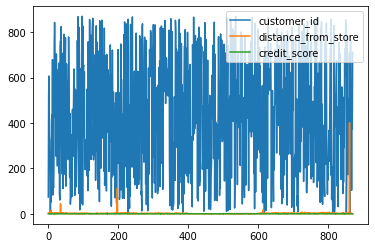

In [227]:
customer_details.plot()

In [229]:
daily_sales_summary = transactions.groupby('transaction_date')[['sales_cost','num_items']].sum().reset_index()
print(daily_sales_summary)

    transaction_date  sales_cost  num_items
0         2020-04-01     9603.37       1597
1         2020-04-02     9204.05       1517
2         2020-04-03     8601.98       1454
3         2020-04-04    10536.01       1556
4         2020-04-05     9289.63       1500
..               ...         ...        ...
178       2020-09-26     9660.28       1345
179       2020-09-27    12050.46       1707
180       2020-09-28     9298.39       1311
181       2020-09-29     9560.54       1406
182       2020-09-30     9190.65       1368

[183 rows x 3 columns]


<AxesSubplot: >

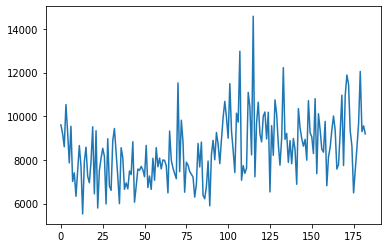

In [230]:
daily_sales_summary['sales_cost'].plot()

<AxesSubplot: xlabel='transaction_date'>

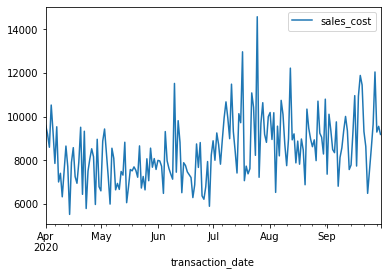

In [231]:
daily_sales_summary.plot(x = 'transaction_date', y = 'sales_cost')

<AxesSubplot: xlabel='transaction_date'>

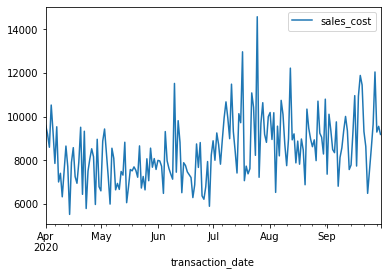

In [232]:
daily_sales_summary.plot(x = 'transaction_date', y = 'sales_cost', kind='line')

<AxesSubplot: xlabel='num_items', ylabel='sales_cost'>

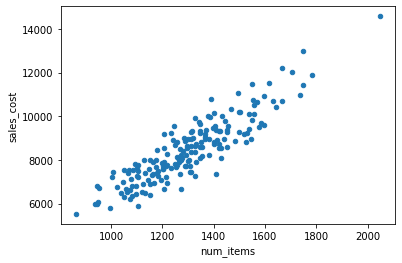

In [233]:
daily_sales_summary.plot(x = 'num_items', y = 'sales_cost', kind='scatter')

<AxesSubplot: >

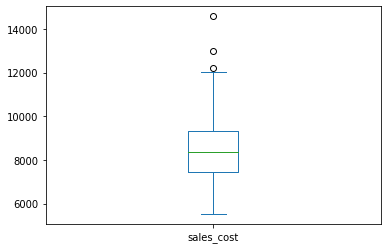

In [234]:
daily_sales_summary.plot(y = 'sales_cost', kind='box')
#median is the 50th percentile 
# upper and lower quartiles up 75th and below 25th
# 5th lower and 95th upper lines

<AxesSubplot: ylabel='Frequency'>

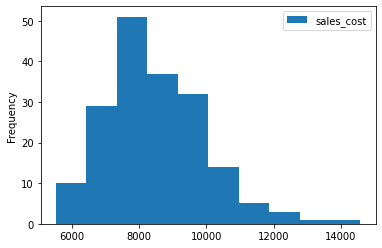

In [236]:
daily_sales_summary.plot(y = 'sales_cost', kind='hist')

<AxesSubplot: ylabel='Frequency'>

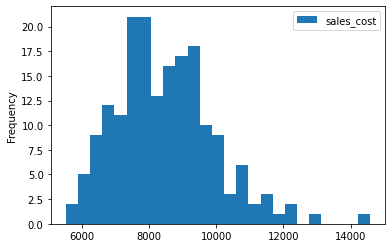

In [237]:
daily_sales_summary.plot(y = 'sales_cost', kind='hist', bins=25)

<AxesSubplot: xlabel='product_area_name'>

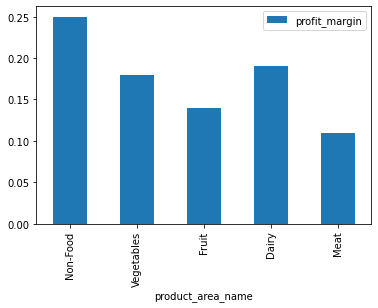

In [238]:
product_areas.plot(kind="bar", y = "profit_margin", x ="product_area_name")

## Exporting Data